In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor
from catboost import CatBoostRegressor


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn import metrics
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
from sklearn import preprocessing
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn import metrics
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import re

In [57]:
answers = pd.read_csv("answers.csv")
density = pd.read_csv("density.csv")
test = pd.read_csv("test.csv")
train = pd.read_csv("can.csv")
train

,JobId,ServiceId,UserId,JobState,JobCity,JobDistrict,UserCallPreference,Price,IsRepeat,CampaignId,...,day_of_year_create_date,year_start_date,month_start_date,Week_start_date,day_start_date,day_of_week_start_date,day_of_year_start_date,weekend_start_date,weekend_name_create_date,acceptance_period_day
0,64143,0,41955,10,110,1344,0,37.710843,No,13,...,102,2020,4,16,14,1,105,0,1,3
1,2532,0,2394,0,0,583,0,18.634538,No,2,...,265,2019,9,39,24,1,267,0,1,2
2,47251,0,32958,1,3,610,0,33.092369,No,29,...,114,2019,4,17,27,5,117,1,0,3
3,5696,0,5203,0,11,22,0,37.510040,Yes,26,...,250,2019,9,37,13,4,256,0,1,6
4,152888,0,34247,7,27,1065,1,30.682731,Yes,3,...,113,2019,5,19,6,0,126,0,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136195,95490,0,56354,0,32,337,0,37.911647,Yes,6,...,109,2019,4,16,21,6,111,1,0,2
136196,124052,0,68120,0,13,304,0,19.638554,No,1,...,3,2020,1,2,6,0,6,0,0,3
136197,103694,0,22984,0,26,516,0,33.092369,No,8,...,161,2020,6,24,10,2,162,0,0,1
136198,125054,0,68566,9,140,876,0,28.875502,No,25,...,44,2020,2,8,18,1,49,0,0,5


In [3]:
a = train.groupby("ServiceId")
a.get_group(0).IsFulfilled.value_counts()

1    81161
0    44772
Name: IsFulfilled, dtype: int64

In [4]:
train = train.drop(["UserId"],axis=1)
train

,JobId,ServiceId,JobState,JobCity,JobDistrict,UserCallPreference,Price,IsRepeat,CampaignId,TimeSpent,...,day_of_year_create_date,year_start_date,month_start_date,Week_start_date,day_start_date,day_of_week_start_date,day_of_year_start_date,weekend_start_date,weekend_name_create_date,acceptance_period_day
0,64143,0,10,110,1344,0,37.710843,No,13,101.608,...,102,2020,4,16,14,1,105,0,1,3
1,2532,0,0,0,583,0,18.634538,No,2,101.605,...,265,2019,9,39,24,1,267,0,1,2
2,47251,0,1,3,610,0,33.092369,No,29,65.343,...,114,2019,4,17,27,5,117,1,0,3
3,5696,0,0,11,22,0,37.510040,Yes,26,142.871,...,250,2019,9,37,13,4,256,0,1,6
4,152888,0,7,27,1065,1,30.682731,Yes,3,79.846,...,113,2019,5,19,6,0,126,0,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136195,95490,0,0,32,337,0,37.911647,Yes,6,117.800,...,109,2019,4,16,21,6,111,1,0,2
136196,124052,0,0,13,304,0,19.638554,No,1,89.135,...,3,2020,1,2,6,0,6,0,0,3
136197,103694,0,0,26,516,0,33.092369,No,8,85.785,...,161,2020,6,24,10,2,162,0,0,1
136198,125054,0,9,140,876,0,28.875502,No,25,110.358,...,44,2020,2,8,18,1,49,0,0,5


In [5]:
def duzenleServiceId(df):
    df = df[df.ServiceId != 2]
    df.reset_index(drop=True, inplace=True)
    return df
    
train = duzenleServiceId(train)
test = duzenleServiceId(test)

In [6]:
def onehot(df,col,col_names=["",""]):
    new_col = pd.get_dummies(df[col])
    new_col.columns = col_names
    train_ = pd.concat([df,new_col],axis=1)
    train_.drop([col],axis=1,inplace=True)
    return train_

train = onehot(train,"ServiceId",col_names=["Service1","Service2"])
train = onehot(train,"UserCallPreference",col_names=["UserCall0","UserCall1","UserCall2"])
train = onehot(train,"IsRepeat",col_names=["IsRepeat0","IsRepeat1"])

deneme = np.arange(0,30,1)
colNames = []
for i in list(deneme):
    colNames.append("CampaignId"+str(i))

train = onehot(train,"CampaignId",col_names=colNames)


In [7]:
answerdf = answers.groupby('JobId')['Answer'].apply(list).reset_index() ## Kategorik olacak
objs = pd.DataFrame(answerdf['Answer'].tolist()).iloc[:, :4]
answerdf = pd.DataFrame(objs)
answerdf['JobId'] = answerdf.index
answerdf.columns = ["Q1","Q2","Q3","Q4","JobId"]
answerdf.drop(["JobId"],axis=1,inplace=True)
answerdf = pd.get_dummies(answerdf.astype(str))
answerdf['JobId'] = answerdf.index

In [8]:
train = pd.merge(train,answerdf,how="inner").drop(["JobId"],axis=1)
train.columns

Index(['JobState', 'JobCity', 'JobDistrict', 'Price', 'TimeSpent',
       'IsFulfilled', 'year_create_date', 'month_create_date',
       'Week_create_date', 'day_create_date', 'day_of_week_create_date',
       'day_of_year_create_date', 'year_start_date', 'month_start_date',
       'Week_start_date', 'day_start_date', 'day_of_week_start_date',
       'day_of_year_start_date', 'weekend_start_date',
       'weekend_name_create_date', 'acceptance_period_day', 'Service1',
       'Service2', 'UserCall0', 'UserCall1', 'UserCall2', 'IsRepeat0',
       'IsRepeat1', 'CampaignId0', 'CampaignId1', 'CampaignId2', 'CampaignId3',
       'CampaignId4', 'CampaignId5', 'CampaignId6', 'CampaignId7',
       'CampaignId8', 'CampaignId9', 'CampaignId10', 'CampaignId11',
       'CampaignId12', 'CampaignId13', 'CampaignId14', 'CampaignId15',
       'CampaignId16', 'CampaignId17', 'CampaignId18', 'CampaignId19',
       'CampaignId20', 'CampaignId21', 'CampaignId22', 'CampaignId23',
       'CampaignId24', 'Cam

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136145 entries, 0 to 136144
Data columns (total 85 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   JobState                  136145 non-null  int64  
 1   JobCity                   136145 non-null  int64  
 2   JobDistrict               136145 non-null  int64  
 3   Price                     136145 non-null  float64
 4   TimeSpent                 136145 non-null  float64
 5   IsFulfilled               136145 non-null  int64  
 6   year_create_date          136145 non-null  int64  
 7   month_create_date         136145 non-null  int64  
 8   Week_create_date          136145 non-null  int64  
 9   day_create_date           136145 non-null  int64  
 10  day_of_week_create_date   136145 non-null  int64  
 11  day_of_year_create_date   136145 non-null  int64  
 12  year_start_date           136145 non-null  int64  
 13  month_start_date          136145 non-null  i

In [10]:
train.columns

Index(['JobState', 'JobCity', 'JobDistrict', 'Price', 'TimeSpent',
       'IsFulfilled', 'year_create_date', 'month_create_date',
       'Week_create_date', 'day_create_date', 'day_of_week_create_date',
       'day_of_year_create_date', 'year_start_date', 'month_start_date',
       'Week_start_date', 'day_start_date', 'day_of_week_start_date',
       'day_of_year_start_date', 'weekend_start_date',
       'weekend_name_create_date', 'acceptance_period_day', 'Service1',
       'Service2', 'UserCall0', 'UserCall1', 'UserCall2', 'IsRepeat0',
       'IsRepeat1', 'CampaignId0', 'CampaignId1', 'CampaignId2', 'CampaignId3',
       'CampaignId4', 'CampaignId5', 'CampaignId6', 'CampaignId7',
       'CampaignId8', 'CampaignId9', 'CampaignId10', 'CampaignId11',
       'CampaignId12', 'CampaignId13', 'CampaignId14', 'CampaignId15',
       'CampaignId16', 'CampaignId17', 'CampaignId18', 'CampaignId19',
       'CampaignId20', 'CampaignId21', 'CampaignId22', 'CampaignId23',
       'CampaignId24', 'Cam

In [11]:
train

,JobState,JobCity,JobDistrict,Price,TimeSpent,IsFulfilled,year_create_date,month_create_date,Week_create_date,day_create_date,...,Q3_5.0,Q3_6.0,Q3_7.0,Q3_8.0,Q3_9.0,Q3_nan,Q4_1.0,Q4_2.0,Q4_3.0,Q4_nan
0,10,110,1344,37.710843,101.608,1,2020,4,15,11,...,0,0,1,0,0,0,0,0,0,1
1,0,0,583,18.634538,101.605,0,2019,9,38,22,...,0,0,0,0,0,0,0,0,0,1
2,1,3,610,33.092369,65.343,0,2019,4,17,24,...,0,1,0,0,0,0,0,0,0,1
3,0,11,22,37.510040,142.871,1,2019,9,36,7,...,0,0,0,1,0,0,0,0,0,1
4,7,27,1065,30.682731,79.846,0,2019,4,17,23,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136140,0,32,337,37.911647,117.800,1,2019,4,16,19,...,0,0,1,0,0,0,0,0,0,1
136141,0,13,304,19.638554,89.135,1,2020,1,1,3,...,0,0,0,0,0,0,0,0,0,1
136142,0,26,516,33.092369,85.785,1,2020,6,24,9,...,0,1,0,0,0,0,0,0,0,1
136143,9,140,876,28.875502,110.358,0,2020,2,7,13,...,0,1,0,0,0,0,0,0,0,1


In [12]:
train["JobDistrict"].value_counts()

55      1443
285     1119
164     1116
33      1058
238      995
        ... 
2991       1
3119       1
3568       1
3863       1
821        1
Name: JobDistrict, Length: 3781, dtype: int64

In [13]:
train["JobCity"].value_counts()

24     12869
3       6914
36      6079
14      6032
11      6026
       ...  
276        1
339        1
320        1
278        1
272        1
Name: JobCity, Length: 356, dtype: int64

In [14]:
train["JobState"].value_counts()

0     98727
1     12682
4     10361
7      3084
11     2380
      ...  
75        2
77        2
55        1
76        1
73        1
Name: JobState, Length: 78, dtype: int64

In [15]:
job_state = train["JobState"].astype(str)
JobCity= train["JobCity"].astype(str)
JobDistrict = train["JobDistrict"].astype(str)

In [16]:
job_state_dummies = pd.get_dummies(job_state)
JobCity_dummies = pd.get_dummies(JobCity)
JobDistrict_dummies = pd.get_dummies(JobDistrict)
JobDistrict_dummies

,0,1,10,100,1000,1001,1002,1003,1004,1005,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
136141,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
136142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
136143,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
train_deneme = pd.concat([train,JobDistrict_dummies,JobCity_dummies ,job_state_dummies ], axis=1, join='outer')
train_deneme.drop(["JobState","JobCity","JobDistrict"], axis =1 , inplace = True)

In [112]:
%%sql

SELECT * FROM density;

 * sqlite://
(sqlite3.OperationalError) no such table: density
[SQL: SELECT * FROM density;]
(Background on this error at: http://sqlalche.me/e/13/e3q8)


In [18]:
train_deneme

,Price,TimeSpent,IsFulfilled,year_create_date,month_create_date,Week_create_date,day_create_date,day_of_week_create_date,day_of_year_create_date,year_start_date,...,70,71,72,73,74,75,76,77,8,9
0,37.710843,101.608,1,2020,4,15,11,5,102,2020,...,0,0,0,0,0,0,0,0,0,0
1,18.634538,101.605,0,2019,9,38,22,6,265,2019,...,0,0,0,0,0,0,0,0,0,0
2,33.092369,65.343,0,2019,4,17,24,2,114,2019,...,0,0,0,0,0,0,0,0,0,0
3,37.510040,142.871,1,2019,9,36,7,5,250,2019,...,0,0,0,0,0,0,0,0,0,0
4,30.682731,79.846,0,2019,4,17,23,1,113,2019,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136140,37.911647,117.800,1,2019,4,16,19,4,109,2019,...,0,0,0,0,0,0,0,0,0,0
136141,19.638554,89.135,1,2020,1,1,3,4,3,2020,...,0,0,0,0,0,0,0,0,0,0
136142,33.092369,85.785,1,2020,6,24,9,1,161,2020,...,0,0,0,0,0,0,0,0,0,0
136143,28.875502,110.358,0,2020,2,7,13,3,44,2020,...,0,0,0,0,0,0,0,0,0,1


In [19]:
train

,JobState,JobCity,JobDistrict,Price,TimeSpent,IsFulfilled,year_create_date,month_create_date,Week_create_date,day_create_date,...,Q3_5.0,Q3_6.0,Q3_7.0,Q3_8.0,Q3_9.0,Q3_nan,Q4_1.0,Q4_2.0,Q4_3.0,Q4_nan
0,10,110,1344,37.710843,101.608,1,2020,4,15,11,...,0,0,1,0,0,0,0,0,0,1
1,0,0,583,18.634538,101.605,0,2019,9,38,22,...,0,0,0,0,0,0,0,0,0,1
2,1,3,610,33.092369,65.343,0,2019,4,17,24,...,0,1,0,0,0,0,0,0,0,1
3,0,11,22,37.510040,142.871,1,2019,9,36,7,...,0,0,0,1,0,0,0,0,0,1
4,7,27,1065,30.682731,79.846,0,2019,4,17,23,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136140,0,32,337,37.911647,117.800,1,2019,4,16,19,...,0,0,1,0,0,0,0,0,0,1
136141,0,13,304,19.638554,89.135,1,2020,1,1,3,...,0,0,0,0,0,0,0,0,0,1
136142,0,26,516,33.092369,85.785,1,2020,6,24,9,...,0,1,0,0,0,0,0,0,0,1
136143,9,140,876,28.875502,110.358,0,2020,2,7,13,...,0,1,0,0,0,0,0,0,0,1


In [61]:
density

,District,ServiceId,Count,month_create_date,year_create_date
0,0,0,9,1,2019
1,0,1,1,1,2019
2,1,0,1,1,2019
3,3,0,5,1,2019
4,4,0,1,1,2019
...,...,...,...,...,...
50033,3908,0,1,9,2020
50034,3910,0,1,9,2020
50035,3911,0,1,9,2020
50036,3914,0,1,9,2020


In [ ]:
train_deneme2 = pd.merge(train_deneme,answerdf,how="inner").drop(["JobId"],axis=1)
train_deneme2.columns

In [ ]:
answerdf = answers.groupby('JobId')['Answer'].apply(list).reset_index() ## Kategorik olacak
objs = pd.DataFrame(answerdf['Answer'].tolist()).iloc[:, :4]
answerdf = pd.DataFrame(objs)
answerdf['JobId'] = answerdf.index
answerdf.columns = ["Q1","Q2","Q3","Q4","JobId"]
answerdf.drop(["JobId"],axis=1,inplace=True)
answerdf = pd.get_dummies(answerdf.astype(str))
answerdf['JobId'] = answerdf.index

train = pd.merge(train,answerdf,how="inner").drop(["JobId"],axis=1)
train.columns

In [90]:
density = density.rename(columns={'District': 'JobDistrict'})
density

,JobDistrict,ServiceId,Count,month_create_date,year_create_date
0,0,0,9,1,2019
1,0,1,1,1,2019
2,1,0,1,1,2019
3,3,0,5,1,2019
4,4,0,1,1,2019
...,...,...,...,...,...
50033,3908,0,1,9,2020
50034,3910,0,1,9,2020
50035,3911,0,1,9,2020
50036,3914,0,1,9,2020


In [75]:
answerdf = density.groupby(['District',"ServiceId","month_create_date","year_create_date"])['Count'].apply(list).reset_index() ## Kategorik olacak


In [102]:
train.columns

Index(['JobId', 'ServiceId', 'UserId', 'JobState', 'JobCity', 'JobDistrict',
       'UserCallPreference', 'Price', 'IsRepeat', 'CampaignId', 'TimeSpent',
       'IsFulfilled', 'year_create_date', 'month_create_date',
       'Week_create_date', 'day_create_date', 'day_of_week_create_date',
       'day_of_year_create_date', 'year_start_date', 'month_start_date',
       'Week_start_date', 'day_start_date', 'day_of_week_start_date',
       'day_of_year_start_date', 'weekend_start_date',
       'weekend_name_create_date', 'acceptance_period_day'],
      dtype='object')

In [79]:
train

,JobId,ServiceId,UserId,JobState,JobCity,JobDistrict,UserCallPreference,Price,IsRepeat,CampaignId,...,day_of_year_create_date,year_start_date,month_start_date,Week_start_date,day_start_date,day_of_week_start_date,day_of_year_start_date,weekend_start_date,weekend_name_create_date,acceptance_period_day
0,64143,0,41955,10,110,1344,0,37.710843,No,13,...,102,2020,4,16,14,1,105,0,1,3
1,2532,0,2394,0,0,583,0,18.634538,No,2,...,265,2019,9,39,24,1,267,0,1,2
2,47251,0,32958,1,3,610,0,33.092369,No,29,...,114,2019,4,17,27,5,117,1,0,3
3,5696,0,5203,0,11,22,0,37.510040,Yes,26,...,250,2019,9,37,13,4,256,0,1,6
4,152888,0,34247,7,27,1065,1,30.682731,Yes,3,...,113,2019,5,19,6,0,126,0,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136195,95490,0,56354,0,32,337,0,37.911647,Yes,6,...,109,2019,4,16,21,6,111,1,0,2
136196,124052,0,68120,0,13,304,0,19.638554,No,1,...,3,2020,1,2,6,0,6,0,0,3
136197,103694,0,22984,0,26,516,0,33.092369,No,8,...,161,2020,6,24,10,2,162,0,0,1
136198,125054,0,68566,9,140,876,0,28.875502,No,25,...,44,2020,2,8,18,1,49,0,0,5


In [118]:
result = pd.merge(train_deneme, density["Count"],  how='left', left_on=["JobDistrict","ServiceId","month_create_date","year_create_date"], 
                  right_on = ["JobDistrict","ServiceId","month_create_date","year_create_date"])

KeyError: 'JobDistrict'

In [ ]:
answerdf = answers.groupby('JobId')['Answer'].apply(list).reset_index() ## Kategorik olacak
objs = pd.DataFrame(answerdf['Answer'].tolist()).iloc[:, :4]
answerdf = pd.DataFrame(objs)
answerdf['JobId'] = answerdf.index
answerdf.columns = ["Q1","Q2","Q3","Q4","JobId"]
answerdf.drop(["JobId"],axis=1,inplace=True)
answerdf = pd.get_dummies(answerdf.astype(str))
answerdf['JobId'] = answerdf.index

In [76]:
objs = pd.DataFrame(answerdf['Count'].tolist()).iloc[:, :4]
answerdf = pd.DataFrame(objs)
answerdf["ServiceId"] = answerdf.index
answerdf

,0,ServiceId
0,9,0
1,6,1
2,10,2
3,4,3
4,9,4
...,...,...
50033,2,50033
50034,2,50034
50035,1,50035
50036,1,50036


In [64]:
density

,District,ServiceId,Count,month_create_date,year_create_date
0,0,0,9,1,2019
1,0,1,1,1,2019
2,1,0,1,1,2019
3,3,0,5,1,2019
4,4,0,1,1,2019
...,...,...,...,...,...
50033,3908,0,1,9,2020
50034,3910,0,1,9,2020
50035,3911,0,1,9,2020
50036,3914,0,1,9,2020


In [63]:
answerdf

,District,ServiceId,month_create_date,year_create_date,Count
0,0,0,1,2019,[9]
1,0,0,1,2020,[6]
2,0,0,2,2019,[10]
3,0,0,2,2020,[4]
4,0,0,3,2019,[9]
...,...,...,...,...,...
50033,3920,0,11,2019,[2]
50034,3920,0,11,2020,[2]
50035,3920,0,12,2019,[1]
50036,3920,0,12,2020,[1]


In [54]:
objs

,0,ServiceId
0,9,0
1,6,1
2,10,2
3,4,3
4,9,4
...,...,...
50033,2,50033
50034,2,50034
50035,1,50035
50036,1,50036


In [58]:
density['MonthYear'] = pd.to_datetime(density['MonthYear'],format='%m - %Y')

In [59]:
density['month_create_date'] = density['MonthYear'].dt.month
density['year_create_date'] = density['MonthYear'].dt.year

In [60]:
density.drop(["MonthYear"], axis = 1, inplace = True)
density

,District,ServiceId,Count,month_create_date,year_create_date
0,0,0,9,1,2019
1,0,1,1,1,2019
2,1,0,1,1,2019
3,3,0,5,1,2019
4,4,0,1,1,2019
...,...,...,...,...,...
50033,3908,0,1,9,2020
50034,3910,0,1,9,2020
50035,3911,0,1,9,2020
50036,3914,0,1,9,2020


In [41]:
train

,JobId,ServiceId,UserId,JobState,JobCity,JobDistrict,UserCallPreference,Price,IsRepeat,CampaignId,...,day_of_year_create_date,year_start_date,month_start_date,Week_start_date,day_start_date,day_of_week_start_date,day_of_year_start_date,weekend_start_date,weekend_name_create_date,acceptance_period_day
0,64143,0,41955,10,110,1344,0,37.710843,No,13,...,102,2020,4,16,14,1,105,0,1,3
1,2532,0,2394,0,0,583,0,18.634538,No,2,...,265,2019,9,39,24,1,267,0,1,2
2,47251,0,32958,1,3,610,0,33.092369,No,29,...,114,2019,4,17,27,5,117,1,0,3
3,5696,0,5203,0,11,22,0,37.510040,Yes,26,...,250,2019,9,37,13,4,256,0,1,6
4,152888,0,34247,7,27,1065,1,30.682731,Yes,3,...,113,2019,5,19,6,0,126,0,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136195,95490,0,56354,0,32,337,0,37.911647,Yes,6,...,109,2019,4,16,21,6,111,1,0,2
136196,124052,0,68120,0,13,304,0,19.638554,No,1,...,3,2020,1,2,6,0,6,0,0,3
136197,103694,0,22984,0,26,516,0,33.092369,No,8,...,161,2020,6,24,10,2,162,0,0,1
136198,125054,0,68566,9,140,876,0,28.875502,No,25,...,44,2020,2,8,18,1,49,0,0,5


In [29]:
density

,MonthYear,District,ServiceId,Count
0,2019-01-01,0,0,9
1,2019-01-01,0,1,1
2,2019-01-01,1,0,1
3,2019-01-01,3,0,5
4,2019-01-01,4,0,1
...,...,...,...,...
50033,2020-09-01,3908,0,1
50034,2020-09-01,3910,0,1
50035,2020-09-01,3911,0,1
50036,2020-09-01,3914,0,1


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136145 entries, 0 to 136144
Data columns (total 85 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   JobState                  136145 non-null  int64  
 1   JobCity                   136145 non-null  int64  
 2   JobDistrict               136145 non-null  int64  
 3   Price                     136145 non-null  float64
 4   TimeSpent                 136145 non-null  float64
 5   IsFulfilled               136145 non-null  int64  
 6   year_create_date          136145 non-null  int64  
 7   month_create_date         136145 non-null  int64  
 8   Week_create_date          136145 non-null  int64  
 9   day_create_date           136145 non-null  int64  
 10  day_of_week_create_date   136145 non-null  int64  
 11  day_of_year_create_date   136145 non-null  int64  
 12  year_start_date           136145 non-null  int64  
 13  month_start_date          136145 non-null  i

In [66]:
from sklearn.decomposition import PCA

In [19]:
target = train_deneme["IsFulfilled"]

In [21]:
pca_data = train_deneme.drop(["IsFulfilled"], axis = 1)

In [22]:
pca_data.head(5)

,Price,TimeSpent,year_create_date,month_create_date,Week_create_date,day_create_date,day_of_week_create_date,day_of_year_create_date,year_start_date,month_start_date,...,70,71,72,73,74,75,76,77,8,9
0,37.710843,101.608,2020,4,15,11,5,102,2020,4,...,0,0,0,0,0,0,0,0,0,0
1,18.634538,101.605,2019,9,38,22,6,265,2019,9,...,0,0,0,0,0,0,0,0,0,0
2,33.092369,65.343,2019,4,17,24,2,114,2019,4,...,0,0,0,0,0,0,0,0,0,0
3,37.510040,142.871,2019,9,36,7,5,250,2019,9,...,0,0,0,0,0,0,0,0,0,0
4,30.682731,79.846,2019,4,17,23,1,113,2019,5,...,0,0,0,0,0,0,0,0,0,0


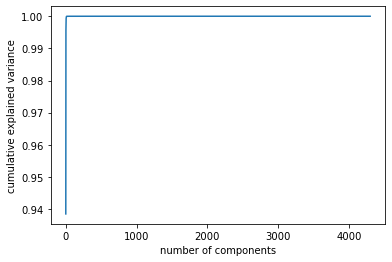

In [100]:
pca = PCA()
pca.fit(pca_data)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [101]:
exp_var_cumul

array([0.93847893, 0.99310019, 0.99559331, ..., 1.        , 1.        ,
       1.        ])

In [102]:
pca = PCA(n_components=5)
pca_model = pca.fit_transform(pca_data)
principalDf = pd.DataFrame(data = pca_model)
principalDf

,0,1,2,3,4
0,782.664504,129.317543,-1.598888,52.263730,3.538842
1,20.219051,-107.400440,0.350224,-36.546092,2.489728
2,45.970600,107.727358,-0.161841,-33.382892,-33.595651
3,-540.311548,-92.469753,-3.081873,-9.589563,43.988883
4,501.510632,104.885549,-7.035895,-22.569465,-18.985713
...,...,...,...,...,...
136140,-226.120887,113.807303,-0.038955,2.904042,19.212429
136141,-260.624607,264.598045,-0.673759,-14.604248,-9.593649
136142,-46.918786,41.351312,0.794308,-8.109530,-12.994328
136143,315.212732,207.806907,-3.855560,95.674326,12.783402


In [103]:
pca_datamiz = pd.concat([principalDf,target], axis=1, join='outer')
pca_datamiz

,0,1,2,3,4,IsFulfilled
0,782.664504,129.317543,-1.598888,52.263730,3.538842,1
1,20.219051,-107.400440,0.350224,-36.546092,2.489728,0
2,45.970600,107.727358,-0.161841,-33.382892,-33.595651,0
3,-540.311548,-92.469753,-3.081873,-9.589563,43.988883,1
4,501.510632,104.885549,-7.035895,-22.569465,-18.985713,0
...,...,...,...,...,...,...
136140,-226.120887,113.807303,-0.038955,2.904042,19.212429,1
136141,-260.624607,264.598045,-0.673759,-14.604248,-9.593649,1
136142,-46.918786,41.351312,0.794308,-8.109530,-12.994328,1
136143,315.212732,207.806907,-3.855560,95.674326,12.783402,0


In [104]:
y = pca_datamiz.IsFulfilled.values
x = pca_datamiz.drop(["IsFulfilled"],axis=1)

In [41]:
y = train_deneme.IsFulfilled.values
x = train_deneme.drop(["IsFulfilled"],axis=1)

In [24]:
y = train.IsFulfilled.values
x = train.drop(["IsFulfilled"],axis=1)

In [45]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42) # Stratify , aynı dağılımda dağıtır.

In [27]:
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([41170, 67746], dtype=int64))

In [46]:
from sklearn.linear_model import LogisticRegression
import sklearn

lr = LogisticRegression()
lr.fit(x_train,y_train)

test_score  = lr.score(x_test,y_test)
train_score = lr.score(x_train,y_train)
y_pred = lr.predict(x_test)
y_train_pred = lr.predict(x_train)

print("Test Logistic Regression Acc  : ", test_score)
print("Train Logistic Regression Acc : ", train_score)
print("Test F1-score                 : ", sklearn.metrics.f1_score(y_test, y_pred,average="macro"))
print("Train F1-Score                : ", sklearn.metrics.f1_score(y_train,y_train_pred,average="macro"))

Test Logistic Regression Acc  :  0.6318263615997649
Train Logistic Regression Acc :  0.6295034705644718
Test F1-score                 :  0.43338555982253685
Train F1-Score                :  0.4321518749718888


In [30]:
import xgboost as xgb
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x_train,y_train)

test_score  = model.score(x_test,y_test)
train_score = model.score(x_train,y_train)
y_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)

print("Test Logistic Regression Acc  : ", test_score)
print("Train Logistic Regression Acc : ", train_score)
print("Test F1-score                 : ", sklearn.metrics.f1_score(y_test, y_pred,average="macro"))
print("Train F1-Score                : ", sklearn.metrics.f1_score(y_train,y_train_pred,average="macro"))

ValueError: feature_names must be unique

,Importance
3,28.301275
0,24.685312
1,20.430079
4,14.880567
2,11.702768


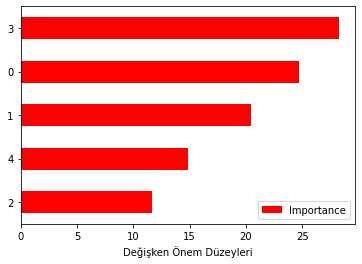

In [49]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

def importance_plot(model_name, thresh_hold):
    Importance=pd.DataFrame({"Importance":model_name.feature_importances_*100},
                       index=x_train.columns)
    importance = Importance.sort_values(by="Importance",
                      axis=0,ascending=False).iloc[0:10,:]
    importance.sort_values(by="Importance",
                      axis=0,ascending=True).plot(kind="barh",color="r")
    plt.xlabel("Değişken Önem Düzeyleri")


    a = Importance.sort_values("Importance", ascending = False)
    display_all(a[a['Importance']>thresh_hold])

importance_plot(model,0.1)

In [69]:
asd

NameError: name 'asd' is not defined

In [13]:
from keras.layers import Dense
from keras.models import Sequential 

print("Model")
model = Sequential()
model.add(Dense(units = 128,activation = 'sigmoid', input_dim = (x_train.shape[1])))
model.add(Dense(units = 128,activation = 'sigmoid'))
model.add(Dense(units = 1,activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(x_train,y_train,epochs=10)

test_score  = model.score(x_test,y_test)
train_score = model.score(x_train,y_train)
y_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)

print("Test Logistic Regression Acc  : ", test_score)
print("Train Logistic Regression Acc : ", train_score)
print("Test F1-score                 : ", sklearn.metrics.f1_score(y_test, y_pred))
print("Train F1-Score                : ", sklearn.metrics.f1_score(y_train,y_train_pred))

NameError: name 'asd' is not defined

In [ ]:
from sklearn.svm import SVC
svm = SVC(random_state=1)
svm.fit(x_train,y_train)
print("SVM Acc : ",svm.score(x_test,y_test))

test_score  = svm.score(x_test,y_test)
train_score = svm.score(x_train,y_train)
y_pred = svm.predict(x_test)
y_train_pred = svm.predict(x_train)

print("Test Logistic Regression Acc  : ", test_score)
print("Train Logistic Regression Acc : ", train_score)
print("Test F1-score                 : ", sklearn.metrics.f1_score(y_test, y_pred))
print("Train F1-Score                : ", sklearn.metrics.f1_score(y_train,y_train_pred))

In [112]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(n_estimators = 5)
dtc.fit(x_train,y_train)

test_score  = dtc.score(x_test,y_test)
train_score = dtc.score(x_train,y_train)
y_pred = dtc.predict(x_test)
y_train_pred = dtc.predict(x_train)

print("Test Logistic Regression Acc  : ", test_score)
print("Train Logistic Regression Acc : ", train_score)
print("Test F1-score                 : ", sklearn.metrics.f1_score(y_test, y_pred,average="macro"))
print("Train F1-Score                : ", sklearn.metrics.f1_score(y_train,y_train_pred,average="macro"))

TypeError: __init__() got an unexpected keyword argument 'n_estimators'

In [47]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 5 )
rfc.fit(x_train,y_train)

test_score  = rfc.score(x_test,y_test)
train_score = rfc.score(x_train,y_train)
y_pred = rfc.predict(x_test)
y_train_pred = rfc.predict(x_train)

print("Test Logistic Regression Acc  : ", test_score)
print("Train Logistic Regression Acc : ", train_score)
print("Test F1-score                 : ", sklearn.metrics.f1_score(y_test, y_pred,average="macro"))
print("Train F1-Score                : ", sklearn.metrics.f1_score(y_train,y_train_pred,average="macro"))

Test Logistic Regression Acc  :  0.6406037680414264
Train Logistic Regression Acc :  0.9622644974108487
Test F1-score                 :  0.5937973661462266
Train F1-Score                :  0.9595641704182309


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)

test_score  = knn.score(x_test,y_test)
train_score = knn.score(x_train,y_train)
y_pred = knn.predict(x_test)
y_train_pred = knn.predict(x_train)

print("Test Logistic Regression Acc  : ", test_score)
print("Train Logistic Regression Acc : ", train_score)
print("Test F1-score                 : ", sklearn.metrics.f1_score(y_test, y_pred))
print("Train F1-Score                : ", sklearn.metrics.f1_score(y_train,y_train_pred))

In [23]:
from keras.layers import Dense
from keras.models import Sequential 

print("Model")
model = Sequential()
model.add(Dense(units = 128,activation = 'sigmoid', input_dim = (x_train.shape[1])))
model.add(Dense(units = 128,activation = 'sigmoid'))
model.add(Dense(units = 1,activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(x_train,y_train,epochs=10)

test_score  = model.score(x_test,y_test)
train_score = model.score(x_train,y_train)
y_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)

print("Test Logistic Regression Acc  : ", test_score)
print("Train Logistic Regression Acc : ", train_score)
print("Test F1-score                 : ", sklearn.metrics.f1_score(y_test, y_pred))
print("Train F1-Score                : ", sklearn.metrics.f1_score(y_train,y_train_pred))

In [20]:
def Missing_Values(data):
    variable_name=[]
    total_value=[]
    total_missing_value=[]
    missing_value_rate=[]
    unique_value_list=[]
    total_unique_value=[]
    data_type=[]
    for col in data.columns:
        variable_name.append(col)
        data_type.append(data[col].dtype)
        total_value.append(data[col].shape[0])
        total_missing_value.append(data[col].isnull().sum())
        missing_value_rate.append(round(data[col].isnull().sum()/data[col].shape[0],3))
        unique_value_list.append(data[col].unique())
        total_unique_value.append(len(data[col].unique()))
    missing_data=pd.DataFrame({"Variable":variable_name,"Total_Value":total_value,\
                             "Total_Missing_Value":total_missing_value,"Missing_Value_Rate":missing_value_rate,
                             "Data_Type":data_type,"Unique_Value":unique_value_list,\
                               "Total_Unique_Value":total_unique_value})
    return missing_data.sort_values("Missing_Value_Rate",ascending=False)

In [21]:
Missing_Values(train)

,Variable,Total_Value,Total_Missing_Value,Missing_Value_Rate,Data_Type,Unique_Value,Total_Unique_Value
0,JobState,136145,0,0.0,int64,"[10, 0, 1, 7, 8, 4, 18, 2, 11, 33, 62, 12, 28,...",78
54,CampaignId26,136145,0,0.0,uint8,"[0, 1]",2
62,Q1_5.0,136145,0,0.0,uint8,"[0, 1]",2
61,Q1_4.0,136145,0,0.0,uint8,"[1, 0]",2
60,Q1_3.0,136145,0,0.0,uint8,"[0, 1]",2
...,...,...,...,...,...,...,...
27,IsRepeat1,136145,0,0.0,uint8,"[0, 1]",2
26,IsRepeat0,136145,0,0.0,uint8,"[1, 0]",2
25,UserCall2,136145,0,0.0,uint8,"[0, 1]",2
24,UserCall1,136145,0,0.0,uint8,"[0, 1]",2
